# Diabetes Prediction

#### using demographic data and body measurements

### About our data
The data collected from the NCHS - National Center for Health Statistics, via the NHANES -National Health and Nutrition Examination Survey (https://www.cdc.gov/Nchs/Nhanes/about_nhanes.htm), a major program of NCHS.

The NHANES is program that designed to assess the health and nutritional status (adults and children) in the US.The survey is unique in that it combines interviews and physical examinations.

NCHS is part of the Centers for Disease Control and Prevention (CDC) and has the responsibility for producing vital and health statistics for the Nation.

The NHANES interview includes demographic, socioeconomic, dietary, and health-related questions. The examination component consists of medical, dental, and physiological measurements, as well as laboratory tests administered by highly trained medical personnel.

- more research that have been published using the NHANES data https://www.ncbi.nlm.nih.gov/pubmed?orig_db=PubMed&term=NHANES&cmd=search

# Data Map
**1. Demographics dataset:**

A complete variable dictionary can be found [here](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Demographics&CycleBeginYear=2013)


**2. Examinations dataset, which contains:**

Blood pressure

Body measures

Muscle strength - grip test

Oral health - dentition

Taste & smell

A complete variable dictionary can be found [here](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Examination&CycleBeginYear=2013)


**3. Dietary data - total nutrient intake, first day:**

A complete variable dictionary can be found [here](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Dietary&CycleBeginYear=2013)



**4. Laboratory dataset, which includes:**

A complete data dictionary can be found [here](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Laboratory&CycleBeginYear=2013)

Albumin & Creatinine - Urine

Apolipoprotein B

Blood Lead, Cadmium, Total Mercury, Selenium, and Manganese

Blood mercury: inorganic, ethyl and methyl

Cholesterol - HDL

Cholesterol - LDL & Triglycerides

Cholesterol - Total

Complete Blood Count with 5-part Differential - Whole Blood

Copper, Selenium & Zinc - Serum

Fasting Questionnaire

Fluoride - Plasma

Fluoride - Water

Glycohemoglobin

Hepatitis A

Hepatitis B Surface Antibody

Hepatitis B: core antibody, surface antigen, and Hepatitis D antibody

Hepatitis C RNA (HCV-RNA) and Hepatitis C Genotype

Hepatitis E: IgG & IgM Antibodies

Herpes Simplex Virus Type-1 & Type-2

HIV Antibody Test

Human Papillomavirus (HPV) - Oral Rinse

Human Papillomavirus (HPV) DNA - Vaginal Swab: Roche Cobas & Roche Linear Array

Human Papillomavirus (HPV) DNA Results from Penile Swab Samples: Roche Linear Array

Insulin

Iodine - Urine

Perchlorate, Nitrate & Thiocyanate - Urine

Perfluoroalkyl and Polyfluoroalkyl Substances (formerly Polyfluoroalkyl Chemicals - PFC)

Personal Care and Consumer Product Chemicals and Metabolites

Phthalates and Plasticizers Metabolites - Urine

Plasma Fasting Glucose

Polycyclic Aromatic Hydrocarbons (PAH) - Urine

Standard Biochemistry Profile

Tissue Transglutaminase Assay (IgA-TTG) & IgA Endomyseal Antibody Assay (IgA EMA)

Trichomonas - Urine

Two-hour Oral Glucose Tolerance Test

Urinary Chlamydia

Urinary Mercury

Urinary Speciated Arsenics

Urinary Total Arsenic

Urine Flow Rate

Urine Metals

Urine Pregnancy Test

Vitamin B12


**Questionnaire dataset, which includes information on:**

A complete variable dictionary can be found [here](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Questionnaire&CycleBeginYear=2013)

Acculturation

Alcohol Use

Blood Pressure & Cholesterol

Cardiovascular Health

Consumer Behavior

Current Health Status

Dermatology

Diabetes

Diet Behavior & Nutrition

Disability

Drug Use

Early Childhood

Food Security

Health Insurance

Hepatitis

Hospital Utilization & Access to Care

Housing Characteristics

Immunization

Income

Medical Conditions

Mental Health - Depression Screener

Occupation

Oral Health

Osteoporosis

Pesticide Use

Physical Activity

Physical Functioning

Preventive Aspirin Use

Reproductive Health

Sexual Behavior

Sleep Disorders

Smoking - Cigarette Use

Smoking - Household Smokers

Smoking - Recent Tobacco Use

Smoking - Secondhand Smoke Exposure

Taste & Smell

Weight History

Weight History - Youth


https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Questionnaire&CycleBeginYear=2013

# Loading and Preparing Our Datasets

In [1]:
# imports
import numpy as np 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot

import re
import sklearn

# ignore any warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1  = pd.read_csv('labs.csv')
df2  = pd.read_csv('examination.csv')
df3  = pd.read_csv('demographic.csv')
df4  = pd.read_csv('diet.csv')
df5  = pd.read_csv('questionnaire.csv')


In [3]:
df1.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


In [4]:
df2.head()

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0


In [5]:
# saving 1 SEQN 
df2.drop(['SEQN'], axis = 1, inplace=True)
df3.drop(['SEQN'], axis = 1, inplace=True)
df4.drop(['SEQN'], axis = 1, inplace=True)
df5.drop(['SEQN'], axis = 1, inplace=True)


In [6]:
# merging to 1 df
df = pd.concat([df1, df2], axis=1, join='inner')
df = pd.concat([df, df3], axis=1, join='inner')
df = pd.concat([df, df4], axis=1, join='inner')
df = pd.concat([df, df5], axis=1, join='inner')

In [7]:
df.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


In [8]:
df.describe()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
count,9813.000000,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000,3329.000000,3145.000000,3145.000000,6553.000000,...,14.0,28.0,4036.000000,4842.000000,2667.000000,5879.000000,5800.000000,1424.000000,1424.000000,1424.000000
mean,78644.559971,41.218854,41.218854,121.072529,10702.811525,41.905695,78917.195254,85.898569,0.858986,4.282085,...,35.0,40.0,413.440287,567.920074,373.831646,315.447355,574.222069,2.586376,2.295646,1.747893
std,2938.592266,238.910226,238.910226,78.574882,6946.019595,276.261093,71088.020067,25.595258,0.255953,0.343649,...,0.0,0.0,1511.368399,1975.492188,1716.831150,1075.040013,7288.930842,0.782529,1.210905,0.707600
min,73557.000000,0.210000,0.210000,5.000000,442.000000,0.210000,0.000000,20.000000,0.200000,2.400000,...,35.0,40.0,75.000000,55.000000,50.000000,85.000000,10.000000,1.000000,1.000000,1.000000
25%,76092.000000,4.500000,4.500000,60.000000,5304.000000,5.020000,33217.405018,68.000000,0.680000,4.100000,...,35.0,40.0,140.000000,125.000000,63.000000,155.000000,25.000000,3.000000,1.000000,1.000000
50%,78643.000000,8.400000,8.400000,106.000000,9370.400000,7.780000,56397.702304,84.000000,0.840000,4.300000,...,35.0,40.0,165.000000,150.000000,66.000000,185.000000,38.000000,3.000000,2.000000,2.000000
75%,81191.000000,17.625000,17.625000,163.000000,14409.200000,15.295000,99356.561999,101.000000,1.010000,4.500000,...,35.0,40.0,198.000000,180.000000,70.000000,225.000000,53.000000,3.000000,3.000000,2.000000
max,83731.000000,9600.000000,9600.000000,659.000000,58255.600000,9000.000000,395978.465792,234.000000,2.340000,5.600000,...,35.0,40.0,9999.000000,9999.000000,9999.000000,9999.000000,99999.000000,9.000000,9.000000,9.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 1812 entries, SEQN to WHQ520
dtypes: float64(1753), int64(28), object(31)
memory usage: 135.7+ MB


In [10]:
# drop na from all axis 
df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')
# importance columns - for the Diabetes pred
df = df.rename(columns = {'SEQN' : 'ID',
                          'RIAGENDR' : 'Gender',
                          'DMDYRSUS' : 'Years_in_US', # Nan -> american i guess
                          'INDFMPIR' : 'Family_income',
                          'LBXGH' : 'GlycoHemoglobin', # test result that tells whether have Diabetes or not
                          'BMXARMC' : 'ArmCircum',
                          'BMDAVSAD' : 'SagittalAbdominal',
                          'MGDCGSZ' : 'GripStrength',
                          'DRABF' : 'Breast_fed'})

df = df.loc[:, ['ID', 'Gender', 'Years_in_US', 'Family_income','GlycoHemoglobin', 'ArmCircum', 
                'SagittalAbdominal', 'GripStrength', 'Breast_fed']]

df.describe()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SagittalAbdominal,GripStrength,Breast_fed
count,9813.000000,9813.000000,1837.000000,9051.000000,6643.000000,9301.000000,7218.000000,7677.000000,8661.000000
mean,78644.559971,1.509426,8.933043,2.253101,5.642556,28.485765,21.114034,63.054891,1.984528
std,2938.592266,0.499937,17.787060,1.635458,1.004850,7.961971,4.963949,25.098439,0.123426
min,73557.000000,1.000000,1.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000
25%,76092.000000,1.000000,3.000000,0.870000,5.200000,22.600000,17.300000,45.600000,2.000000
50%,78643.000000,2.000000,5.000000,1.710000,5.400000,29.300000,20.700000,60.300000,2.000000
75%,81191.000000,2.000000,7.000000,3.610000,5.800000,34.000000,24.400000,80.700000,2.000000
max,83731.000000,2.000000,99.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000


https://en.wikipedia.org/wiki/Glycated_hemoglobin

Use Glycohemoglobin to classify Diabetes 
- 0-> Normal status 
- 1-> High-risk diabetes 
- 2-> Diabetes patients¶


In [11]:
from sklearn.feature_selection import VarianceThreshold
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html
# remove all features that have little variants, if featre has no var it drops it from df. ("like pca" but just delete)

#year in us -> american : 0, not american : 1
df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

df['Years_in_US'] = df['Years_in_US'].apply(lambda x: x if x > 0 else 0)

# fillna
#GlycoHemoglobin, Saggital Abdominal(median)
df['GlycoHemoglobin'] = df['GlycoHemoglobin'].fillna(df['GlycoHemoglobin'].median())
df['SagittalAbdominal'] = df['SagittalAbdominal'].fillna(df['SagittalAbdominal'].median())
df['ArmCircum'] = df['ArmCircum'].fillna(df['ArmCircum'].median())
df['GripStrength'] = df['GripStrength'].fillna(df['GripStrength'].median())

#Family Income -> use ffill to fill na
df['Family_income'] = df['Family_income'].fillna(method='ffill')

#Breat_fed -> fill to 1
df['Breast_fed'] = df['Breast_fed'].fillna(value = 1)

# removed all features with low variance which leaves us with the dataframe below
# Features with a training-set variance lower than this threshold will be removed.
sel = VarianceThreshold(threshold=(0.15))
sel.fit_transform(df)

df.describe()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SagittalAbdominal,GripStrength,Breast_fed
count,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000
mean,78644.559971,1.509426,1.672271,2.246973,5.564201,28.528248,21.004545,62.455233,1.868949
std,2938.592266,0.499937,8.446506,1.635495,0.834491,7.753571,4.261142,22.228196,0.337473
min,73557.000000,1.000000,0.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000
25%,76092.000000,1.000000,0.000000,0.870000,5.300000,23.200000,18.500000,50.300000,2.000000
50%,78643.000000,2.000000,0.000000,1.700000,5.400000,29.300000,20.700000,60.300000,2.000000
75%,81191.000000,2.000000,0.000000,3.600000,5.600000,33.800000,22.900000,73.300000,2.000000
max,83731.000000,2.000000,99.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000


In [12]:
# definition of diabetes
df.loc[df['GlycoHemoglobin'] < 6.0, 'Diabetes'] = 0
df.loc[(df['GlycoHemoglobin'] >= 6.0) & (df['GlycoHemoglobin'] <= 6.4), 'Diabetes'] = 1
df.loc[df['GlycoHemoglobin'] >= 6.5, 'Diabetes'] = 2

df.head(10)

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SagittalAbdominal,GripStrength,Breast_fed,Diabetes
0,73557,1,0.0,0.84,13.9,35.3,20.6,55.2,2.0,2.0
1,73558,1,0.0,1.78,9.1,34.7,24.4,61.5,2.0,2.0
2,73559,1,0.0,4.51,8.9,33.5,25.6,91.0,2.0,2.0
3,73560,1,0.0,2.52,5.4,21.0,14.9,32.2,2.0,0.0
4,73561,2,0.0,5.00,4.9,25.2,20.7,30.9,2.0,0.0
5,73562,1,0.0,4.79,5.5,41.8,29.1,53.1,2.0,0.0
6,73563,1,0.0,5.00,5.4,14.9,20.7,60.3,1.0,0.0
7,73564,2,0.0,5.00,5.5,38.0,26.7,45.9,2.0,0.0
8,73566,1,0.0,5.00,5.4,29.0,19.9,38.8,2.0,0.0
9,73567,2,0.0,0.48,5.2,27.5,20.0,43.5,2.0,0.0


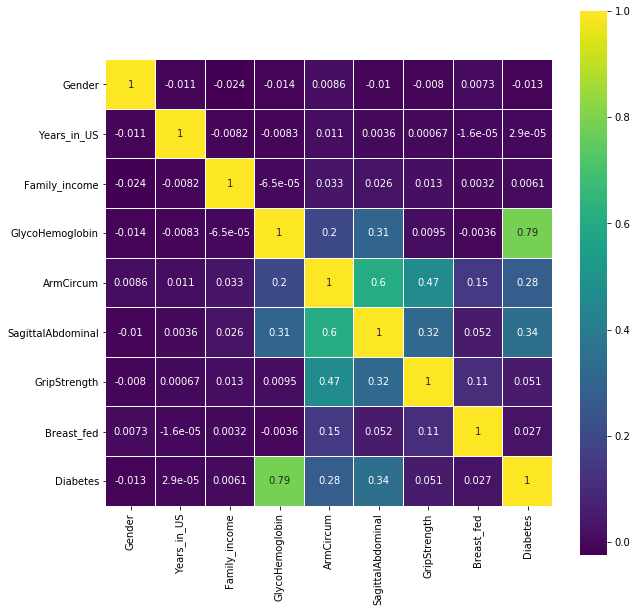

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.astype(float).drop(axis=1, labels='ID').corr(), linewidths=0.1, vmax=1.0,
            square=True, cmap='viridis', annot=True)

# Creating Model

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# drop GlycoHemoglobin because all ready make calculation for the Diabetes column.
# doing that so the target will be Diabetes pred.
df.drop(['GlycoHemoglobin'], axis = 1, inplace=True)

df.head(5)

,ID,Gender,Years_in_US,Family_income,ArmCircum,SagittalAbdominal,GripStrength,Breast_fed,Diabetes
0,73557,1,0.0,0.84,35.3,20.6,55.2,2.0,2.0
1,73558,1,0.0,1.78,34.7,24.4,61.5,2.0,2.0
2,73559,1,0.0,4.51,33.5,25.6,91.0,2.0,2.0
3,73560,1,0.0,2.52,21.0,14.9,32.2,2.0,0.0
4,73561,2,0.0,5.00,25.2,20.7,30.9,2.0,0.0


### Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression

#data -> attributes, target -> diabetes
data = df.drop(['Diabetes'], axis=1)
target = df[['Diabetes']]

In [17]:
#data

In [18]:
#target

In [19]:
#seperate training set and test set ratio 75 to 25% 
train_X = data[:7300]
test_X = data[7300:]
train_Y = target[:7300]
test_Y = target[7300:]

In [20]:
#create linear regression obj
lr_regr = LinearRegression()

#training via linear regression model
lr_regr.fit(train_X, train_Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#make prediction using the test set
lr_pred_diabetes = lr_regr.predict(test_X)
lr_score = lr_regr.score(test_X, test_Y)

In [22]:
print('LRr_Coefficients: ', lr_regr.coef_)
print('LR_Mean Square Error: %.2f' % mean_squared_error(test_Y, lr_pred_diabetes))
print('LR_Variance score: %.2f' % r2_score(test_Y, lr_pred_diabetes))
print('Score: %.2f' % lr_regr.score(test_X, test_Y))

LRr_Coefficients:  [[-1.80681350e-06 -1.61418759e-02 -9.25324388e-04 -4.77556910e-03
   1.08209495e-02  3.55400799e-02 -3.03600063e-03  1.11805941e-02]]
LR_Mean Square Error: 0.24
LR_Variance score: 0.12
Score: 0.12


In [23]:
# the pred table (categorical variable)
lr_pred_diabetes

array([[0.07781471],
       [0.0279395 ],
       [0.2677311 ],
       ...,
       [0.42566603],
       [0.16774444],
       [0.07753259]])

### Decision Tree Classifier

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#create adaboost classification obj
ab_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, 
                            learning_rate=0.5, random_state=100)



In [25]:
#training via adaboost classficiation model
ab_clf.fit(train_X, train_Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [26]:
#make prediction using the test set
ab_pred_diabetes = ab_clf.predict(test_X)
print('prediction: \n', ab_pred_diabetes)

print('\nparms: \n', ab_clf.get_params)

prediction: 
 [0. 0. 0. ... 0. 0. 0.]

parms: 
 <bound method BaseEstimator.get_params of AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
            

In [27]:
#score
ab_clf_score = ab_clf.score(test_X, test_Y)
print("\nmean accuracy: %.2f" % ab_clf.score(test_X, test_Y))


mean accuracy: 0.77


### Bagging Decision Trees Classifiers

In [28]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator= DecisionTreeClassifier(), max_samples = 0.5, max_features = 0.5, 
                            bootstrap = False, bootstrap_features = False)

In [29]:
bagging.fit(train_X, train_Y)
bg_pred_diabetes = bagging.predict(test_X)

In [30]:
bg_dt_score = bagging.score(test_X, test_Y)
bagging.score(test_X, test_Y)

0.873458018304815

### Bagging Decision Trees KNeighbor Classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier

bagging = BaggingClassifier(base_estimator= KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5, 
                            bootstrap = False, bootstrap_features = False)

bagging.fit(train_X, train_Y)
bg_pred_diabetes = bagging.predict(test_X)

bg_score = bagging.score(test_X, test_Y)
bagging.score(test_X, test_Y)

0.8770393951452448

### XGBoost

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

xgboost = GradientBoostingClassifier(random_state=0)
xgboost.fit(train_X, train_Y)

xgboost_score = xgboost.score(test_X, test_Y)
xgboost_score

0.8754476721050537

### Neural Network

In [33]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)

mlp.fit(train_X, train_Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1000, 300, 300), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=False, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [34]:
mlp_pred_diabetes = mlp.predict(test_X)

print("parameter: ", mlp.get_params())

parameter:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (1000, 300, 300), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': False, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [35]:
mlp_score = mlp.score(test_X, test_Y)
mlp.score(test_X, test_Y)

0.8770393951452448

In [36]:
# having around 12% outliers + most algo got same score -> need to add more featueres to get better score
#test_X

### Summarizing Performance 

In [37]:
d = {'Model': ['Linear Regression', 'Adaboost', 'Bagging_decision tree based', 'Bagging_KNeighbors', 'XGBoost', 'MLP'],
     'accuracy' : [lr_score, ab_clf_score, bg_dt_score, bg_score, xgboost_score, mlp_score]}

result_df = pd.DataFrame(data = d)
result_df = result_df.sort_values(by="accuracy", ascending=True)
result_df

,Model,accuracy
0,Linear Regression,0.120880
1,Adaboost,0.765619
2,Bagging_decision tree based,0.873458
4,XGBoost,0.875448
3,Bagging_KNeighbors,0.877039
5,MLP,0.877039


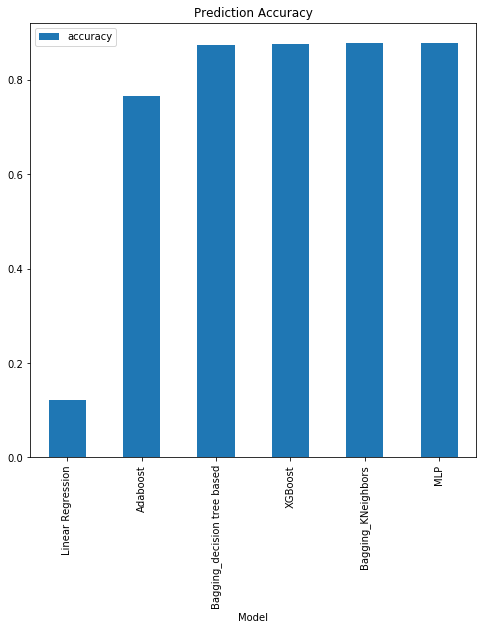

In [38]:
result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), title='Prediction Accuracy', 
               sort_columns=True)